In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import pandas as pd
import time

In [2]:
start_time = time.time()
#integration of the Henon-Heiles system
N = 500
a = 0
b = 25
h = 0.05#(b-a)/N
H = 1/8                             #the total energy of the system

In [3]:
h

0.05

In [4]:
#initializing vectors
x_a1 = np.zeros(N, dtype='float')
x_a2 = np.zeros(N, dtype='float')
y_a1 = np.zeros(N, dtype='float')
y_a2 = np.zeros(N, dtype='float')
px_b1 = np.zeros(N, dtype='float')
px_b2 = np.zeros(N, dtype='float')
py_b1 = np.zeros(N, dtype='float')
py_b2= np.zeros(N, dtype='float')
H_new = np.zeros(N, dtype='float')
error = np.zeros(N, dtype='float')

In [5]:
#define the deviation vectors and fill them with zeros
dx_a1 = np.zeros(N, dtype='float')
dx_a2 = np.zeros(N, dtype='float')
dy_a1 = np.zeros(N, dtype='float')
dy_a2 = np.zeros(N, dtype='float')
dpx_b1 = np.zeros(N, dtype='float')
dpx_b2 = np.zeros(N, dtype='float')
dpy_b1 = np.zeros(N, dtype='float')
dpy_b2= np.zeros(N, dtype='float')

In [6]:
#vectors for the PSS
x_new = np.zeros(N, dtype='float')
y_new = np.zeros(N, dtype='float')
px_new = np.zeros(N, dtype='float')
py_new = np.zeros(N, dtype='float')

In [7]:
#storage of the LCE
LCE= np.zeros(N, dtype='float')
#a = np.zeros(N, dtype='float')

In [8]:
#set intial conditions for the orbit
y_vals =[-00.1]
x0 = 0
py0 = 0

dx0 = 1
dy0 = 0
dpy0 = 0

#intial condition of the deviation vector
#define dunction to find px0
def initial_px(x0, y0, py0):
    return np.sqrt(2*H - py0**2  - y0**2 - 2*x0**2*y0 + (2/3)*y0**2)

dpx0 = 0#initial_px(dx0, dy0, dpy0)

In [9]:
def alpha(x, y, px, py):
    return np.linalg.norm([x, y, px, py])#np.sqrt(x**2 + y**2 + px**2 + py**2)

In [10]:
#normalize the initial deviation vectors
dx0 = dx0/alpha(dx0, dy0, dpx0, dpy0)
dy0 = dy0/alpha(dx0, dy0, dpx0, dpy0)
dpx0 = dpx0/alpha(dx0, dy0, dpx0, dpy0)
dpy0 = dpy0/alpha(dx0, dy0, dpx0, dpy0)

In [11]:
vec = np.zeros(N, dtype='float')


/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/realeboga/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


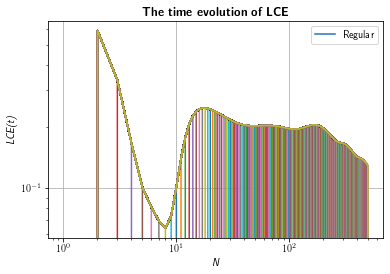

In [12]:
#integration constants of then FR4(t)
a1 = 1/(2*(2 - 2**(1/3)))
a2 = (1-2**(1/3))/(2*(2 - 2**(1/3)))
b1 = 1/(2 - 2**(1/3))
b2 = (2**(1/3))/(2 - 2**(1/3))
#propagate the intial conditions forward
i = 0                   #first itegration
#for val in y_vals:
y0 = y_vals[0]
px0 = initial_px(x0, y0, py0)

for i in range(N-1):
    #handle the first iteration i = 0
    x_a1[0] = x0 #+ a1*h*px0
    y_a1[0] = y0 #+ a1*h*py0
    px_b1[0] = px0 #- b1*h*(x_a1[0] + 2*x_a1[0]*y_a1[0])
    py_b1[0] = py0 #- b1*h*(y_a1[0] + x_a1[0]**2 - y_a1[0]**2)
    #integration of deviation vectors
    #handle the first iteration i = 0
    dx_a1[0] = dx0 
    dy_a1[0] = dy0 
    dpx_b1[0] = dx0
    dpy_b1[0] = dpy0 
    
    #propagate forward for all time steps
    x_a2[i] = x_a1[i]  + a2*h*px_b1[i]
    y_a2[i] = y_a1[i] + a2*h*py_b1[i]
    px_b2[i] = px_b1[i] - b2*h*(x_a2[i] + 2*x_a2[i]*y_a2[i])
    py_b2[i] = py_b1[i] - b2*h*(y_a2[i] + x_a2[i]**2 - y_a2[i]**2)
    
    
    #propagate forward
    dx_a2[i] = dx_a1[i]  + a2*h*dpx_b1[i]
    dy_a2[i] = dy_a1[i] + a2*h*dpy_b1[i]
    dpx_b2[i] = dpx_b1[i] - b2*h*((1 + 2*y_a2[i])*dx_a2[i] + 2*x_a2[i]*dy_a2[i])
    dpy_b2[i] = dpy_b1[i] + b2*h*(-2*x_a2[i]*dx_a2[i] + (-1 + 2*y_a1[i])*dy_a2[i])
    
    
    x_a2[i+1] = x_a2[i]  + a2*h*px_b2[i]
    y_a2[i+1] = y_a2[i] + a2*h*py_b2[i]
    px_b1[i+1] = px_b2[i] - b1*h*(x_a2[i+1] + 2*x_a2[i+1]*y_a2[i+1])
    py_b1[i+1] = py_b2[i] - b1*h*(y_a2[i+1] + x_a2[i+1]**2 - y_a2[i+1]**2)
    
    dx_a2[i+1] = dx_a1[i]  + a2*h*dpx_b2[i]
    dy_a2[i+1] = dy_a1[i] + a2*h*dpy_b2[i]
    dpx_b1[i+1] = dpx_b2[i] - b1*h*((1 + 2*y_a2[i+1])*dx_a2[i+1] + 2*x_a2[i+1]*dy_a2[i+1])
    dpy_b1[i+1] = dpy_b2[i] + b1*h*(-2*x_a2[i+1]*dx_a2[i+1] + (-1 + 2*y_a1[i+1])*dy_a2[i+1])
    
    
    x_a1[i+1] = x_a2[i+1]  + a1*h*px_b1[i+1]
    y_a1[i+1] = y_a2[i+1] + a1*h*py_b1[i+1]
    dx_a1[i+1] = dx_a2[i+1]  + a1*h*dpx_b2[i+1]
    dy_a1[i+1] = dy_a2[i+1] + a1*h*dpy_b2[i+1]
    #calculate the total energy
    H_new[i] = (1/2)*(px_b1[i+1]**2 + py_b1[i+1]**2) + (1/2)*(x_a1[i+1]**2 + y_a1[i+1]**2) + x_a1[i+1]**2 *y_a1[i+1] - (1/3)*y_a1[i+1]**3
    error[i] = abs(H_new[i] - H)
    
    #handle the computation of the maximal Lyapunov exponent
    
    #a[i] = np.sqrt(dx_a1[i]**2 + dy_a1[i]**2 + dpx_b1[i]**2 + dpy_b1[i]**2 )
    
    #compute and store values of LCE
    for idx in range(1, i):
        if i == 0:
            '''
            LCE[i] = (1/(h))*np.sum(np.log(np.linalg.norm([dx_a1[idx], dy_a1[idx], dpx_b1[idx], dpy_b1[idx]])))
            '''
            lyapunov = (1/(h))*np.sum(np.log(np.linalg.norm([dx_a1[idx], dy_a1[idx], dpx_b1[idx], dpy_b1[idx]])))
        else:
            vec[i] = np.log(np.linalg.norm([dx_a1[idx], dy_a1[idx], dpx_b1[idx], dpy_b1[idx]]))
            LCE[i] = (1/(i*h))*np.sum(vec)
        lyapunov = (1/(i*h))*np.sum(vec)
    #renormalize the deviation vectors 
    dx_a1[i+1] = dx_a1[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dy_a1[i+1] = dy_a1[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dpx_b1[i+1] = dpx_b1[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dpy_b1[i+1] = dpy_b1[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dx_a2[i+1] = dx_a2[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dy_a2[i+1] = dy_a2[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dpx_b2[i+1] = dpx_b2[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    dpy_b2[i+1] = dpy_b2[i+1]/np.linalg.norm([dx_a1[i+1], dy_a1[i+1], dpx_b1[i+1], dpy_b1[i+1]])
    i+=1
    plt.grid()
    plt.loglog(np.linspace(0,N, N), LCE)
    plt.legend(['Regular'])
    plt.title(r'\textbf{The time evolution of LCE}')
    plt.xlabel(r'\textit{N}')
    plt.ylabel(r'\textit{LCE(t)}')

    

Text(0, 0.5, '\\textit{LCE(t)}')

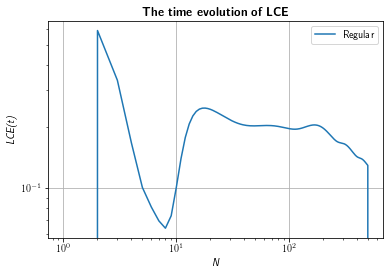

In [13]:
plt.grid()
plt.loglog(np.linspace(0,N, N), LCE)
plt.legend(['Regular'])
plt.title(r'\textbf{The time evolution of LCE}')
plt.xlabel(r'\textit{N}')
plt.ylabel(r'\textit{LCE(t)}')


In [14]:
lyapunov

0.12933554504541464

In [15]:
lyapunov

0.12933554504541464

CPU Time:  16.741674184799194


Text(0, 0.5, 'py')

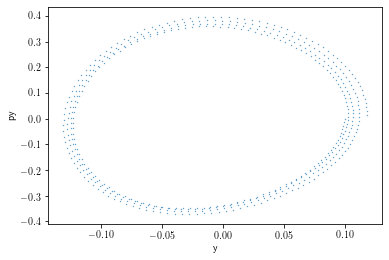

In [16]:
end_time = time.time() - start_time
print('CPU Time: ', end_time)
plt.scatter(y_a1, py_b1, s=0.1)
plt.xlabel('y')
plt.ylabel('py')

Text(0, 0.5, 'px')

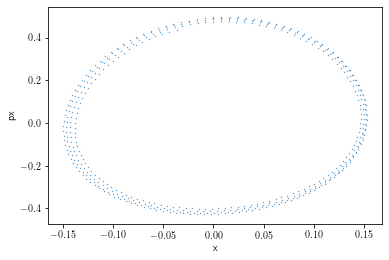

In [17]:
plt.scatter(x_a1, px_b1, s=0.1)
plt.xlabel('x')
plt.ylabel('px')

Text(0, 0.5, 'y')

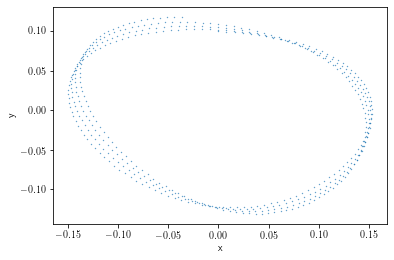

In [18]:
plt.scatter(x_a1, y_a1,marker='o',  s=0.1)
plt.xlabel('x')
plt.ylabel('y')

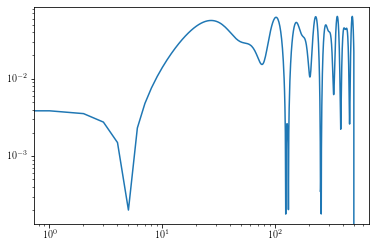

In [19]:
plt.loglog(np.linspace(0,N, N), error)